# Analysis for Section 5.1 (ctd.): CST w/o vs CST w/

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# src files
from situation_testing.situation_testing import SituationTesting
# plot params
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=11)
plt.rc('legend', fontsize=11)
plt.rc('lines', linewidth=2)
plt.rc('axes', linewidth=2)
plt.rc('axes', edgecolor='k')
plt.rc('xtick.major', width=2)
plt.rc('xtick.major', size=6)
plt.rc('ytick.major', width=2)
plt.rc('ytick.major', size=6)
plt.rc('pdf', fonttype=42)
plt.rc('ps', fonttype=42)

In [2]:
# working directory
wd = os.path.dirname(os.getcwd())
# relevant folders
data_path = os.path.abspath(os.path.join(wd, 'data')) + '\\'
resu_path = os.path.abspath(os.path.join(wd, 'results')) + '\\'

In [3]:
# factual dataset
org_df    = pd.read_csv(data_path + 'LoanApplication_v2.csv', sep='|', )
# counterfactual dataset
org_cf_df = pd.read_csv(data_path + 'counterfactuals\\cf_LoanApplication_v2.csv', sep='|', )

## What's our guess given the current set-up?

Here, let's keep in mind that $\tau=0.0$, meaning any deviation from it by $\Delta p$ is punished by CST as discrimination (under the literal definition). Based on the $k$-results for literal and statistical definitions, my hunch is that CST w/ detects cases with minor deviations under the literal def. that are not statistically significant under the statistical def. -- similar to our CF example.

Importantly, CST w/ uses k+1 neighborhoods (this fact is clear both in the paper and in the code) as it includes the search centers. However, it is important to keep in mind that we do not just add the next neighboor to the $kth$ instance under CST w/ but, in fact, *the most relevant comparison* to each group. It is not surprising that they are impactful, though not in a statistically significant way. This is probably due to the way we generateed the synthetic dataset: clearly unbalanced and biased toward females.

From the two tables below, as well as the two figures, it is clear that the complainants' counterfactuals are "representative" of the males in $\mathcal{D}$. What is interesting is that said dataset is considerably imbalanced. The test-search space is much denser than the control-search space. 

Further, if you look at the summary stats for $k=15$, the ctr and tst groups between w/ and w/o versions are essentially the same. When they coincide, they do so for everything, meaning the search centers do not tilt $\Delta p$ (Set 1). The opposite occurs for Set 2: the $k+1$ tilts enough the $\Delta p$ for CST to pick it up... again, not enough statistically speaking!!! This supports what we find in the previous section. In other words, there's no drastic change in the group compositions but just on the counts of negative decisions, again, a **small enough change in $\Delta p$ for CST to pick it up under the literal definition**. These are likely cases near the border: factual is -1 and its counterfactual 1.  

Naturally, the impact of this $k+1$ is greater for lower $k$. As $k$ increases, we would expect for the impact of the additional comparison (we stress again that being the most important comparison of them all: complainant and counterfactual) to decrease.

Again, these results don't affect the ST vs CST comparison, which is the main experimental concern as it is the CP vs MM comparison, but they further stress the importance of measuring uncertainty and whether it is needed and when and why... Stress in the discussion.

In [4]:
org_df[['AnnualSalary', 'AccountBalance', 'Gender']].groupby('Gender').describe().round(2)

AnnualSalary                                                            \
              count       mean       std     min      25%       50%       75%   
Gender                                                                          
0            3281.0  100655.29  32509.34     0.0  80000.0  100000.0  120000.0   
1            1712.0   84858.94  31634.45  5000.0  62000.0   83500.0  106500.0   

                 AccountBalance                                         \
             max          count      mean       std      min       25%   
Gender                                                                   
0       270000.0         3281.0  30207.08  10049.34  1851.66  23155.54   
1       201000.0         1712.0  24302.71   9789.64   498.02  17453.30   

                                      
             50%       75%       max  
Gender                                
0       29621.16  36932.95  76890.36  
1       23786.97  30923.07  59268.50

In [5]:
org_cf_df[['AnnualSalary', 'AccountBalance', 'Gender']].groupby('Gender').describe().round(2)

AnnualSalary                                                      \
              count       mean       std       min       25%        50%   
Gender                                                                    
0            3281.0  100655.29  32509.34     -0.00  80000.00  100000.00   
1            1712.0  100655.29  31634.45  20796.35  77796.35   99296.35   

                             AccountBalance                               \
              75%        max          count      mean       std      min   
Gender                                                                     
0       120000.00  270000.00         3281.0  30207.08  10049.34  1851.66   
1       122296.35  216796.35         1712.0  30207.08   9789.64  6402.39   

                                                
             25%       50%       75%       max  
Gender                                          
0       23155.54  29621.16  36932.95  76890.35  
1       23357.68  29691.34  36827.45  65172.87

Text(0.5, 0, 'Annual salary ($X1$)')

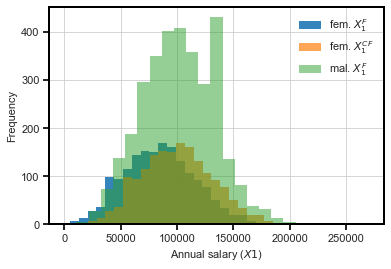

In [6]:
# distributions for X1
b = 25
plt.hist(org_df[org_df['Gender'] == 1]['AnnualSalary'], bins=b, alpha=0.9, label=r'fem. $X_1^F$')
plt.hist(org_cf_df[org_cf_df['Gender'] == 1]['AnnualSalary'], bins=b, alpha=0.7, label=r'fem. $X_1^{CF}$')
plt.hist(org_df[org_df['Gender'] == 0]['AnnualSalary'], bins=b, alpha=0.5, label=r'mal. $X_1^F$')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel(r'Annual salary ($X1$)')

Text(0.5, 0, 'Account balance ($X_2$) for females')

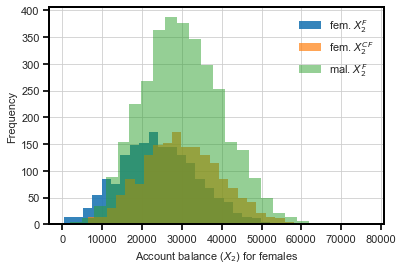

In [7]:
# distributions X2
b = 25
plt.hist(org_df[org_df['Gender'] == 1]['AccountBalance'], bins=b, alpha=0.9, label=r'fem. $X_2^F$')
plt.hist(org_cf_df[org_cf_df['Gender'] == 1]['AccountBalance'], bins=b, alpha=0.7, label=r'fem. $X_2^{CF}$')
plt.hist(org_df[org_df['Gender'] == 0]['AccountBalance'], bins=b, alpha=0.5, label=r'mal. $X_2^F$')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel(r'Account balance ($X_2$) for females')

## Regarding k=15 results, $\tau=0.0$

In [8]:
res_df = org_df[['Gender', 'LoanApproval']].copy()
res_df['cf_LoanApproval'] = org_cf_df['LoanApproval'].copy()

In [9]:
# ### attribute-specific params
# feat_trgt = 'LoanApproval'
# feat_trgt_vals = {'positive': 1, 'negative': -1}
# # list of relevant features
# feat_rlvt = ['AnnualSalary', 'AccountBalance']
# # protected feature
# feat_prot = 'Gender'
# # values for the protected feature: use 'non_protected' and 'protected' accordingly
# feat_prot_vals = {'non_protected': 0, 'protected': 1}

### st-specific params
# size of neighborhoods
n = 15
# significance level
alpha = 0.05
# tau diviation
tau = 0.0

In [10]:
print("For k=", n)

test_df    = org_df.copy()
test_cf_df = org_cf_df.copy()

cst = SituationTesting()
cst.setup_baseline(test_df, test_cf_df, nominal_atts=['Gender'], continuous_atts=['AnnualSalary', 'AccountBalance'])

print("CST w/o")
res_df['CSTwo'] = cst.run(target_att='LoanApproval', target_val={'positive': 1, 'negative': -1},
                          sensitive_att='Gender', sensitive_val={'non_protected': 0, 'protected': 1},
                          include_centers=False, 
                          k=n, alpha=alpha, tau=tau)
# num. cases
print(res_df[res_df['CSTwo'] > tau].shape[0])
# get neighnorhoods
cst_wo_knns = cst.res_dict_df_neighbors
# disc stats
cst_wo_stts = cst.get_test_discrimination()
# num. cases (stat sig)
print(cst_wo_stts[(cst_wo_stts['DiscEvi'] == 'Yes') & (cst_wo_stts['StatEvi'] == 'Yes')].shape[0])

print("CST wi/")
res_df['CSTwi'] = cst.run(target_att='LoanApproval', target_val={'positive': 1, 'negative': -1},
                          sensitive_att='Gender', sensitive_val={'non_protected': 0, 'protected': 1},
                          include_centers=True,
                          k=n, alpha=alpha, tau=tau)
# num. cases
print(res_df[res_df['CSTwi'] > tau].shape[0])
# get neighnorhoods
cst_wi_knns = cst.res_dict_df_neighbors
# disc stats
cst_wi_stts = cst.get_test_discrimination()
# num. cases (stat sig)
print(cst_wi_stts[(cst_wi_stts['DiscEvi'] == 'Yes') & (cst_wi_stts['StatEvi'] == 'Yes')].shape[0])

print("=== DONE ===")

For k= 15
CST w/o
288
272
CST wi/
420
272
=== DONE ===


In [11]:
# Set1: c is in CST w/o and w/
set1 = res_df[(res_df['CSTwo'] > tau) & (res_df['CSTwi'] > tau)].index.to_list()

# check
print('All CST w/o cases in CST w/?')
if res_df[res_df['CSTwo'] > tau].shape[0] == len(set1):
    print('Yes')
else:
    print('No')

# Set2: c is in CST w/ but not in CST w/o
set2 = [c for c in res_df[(res_df['CSTwi'] > tau)].index.to_list() if c not in set1]
print(len(set2), "are only in CST w/")

# check
print((len(set1) + len(set2)) == res_df[res_df['CSTwi'] > tau].shape[0])

All CST w/o cases in CST w/?
Yes
132 are only in CST w/
True


In [12]:
# c's in CST w/o and w/ THAT ARE STATISTICALLY SIGNIFICANT
temp_s1 = cst_wi_stts[(cst_wi_stts['DiscEvi'] == 'Yes') & (cst_wi_stts['StatEvi'] == 'Yes')]['individual'].to_list()
temp_s2 = cst_wo_stts[(cst_wo_stts['DiscEvi'] == 'Yes') & (cst_wo_stts['StatEvi'] == 'Yes')]['individual'].to_list()
temp_s3 = [c for c in temp_s1 if c in temp_s2]
# Are these the same for both CST versions?
print(len(temp_s1) == len(temp_s3))

True


In [13]:
# Summary stats for c's in both CST w/ and w/o (i.e., set1): let's look at both versions

print("For k=", n)

nsf = 2
list_temp_df = []
var = ['AnnualSalary', 'AccountBalance', 'LoanApproval']

for c in set1:
    
    temp_df = {}
    
    temp_ctr_wo = org_df.iloc[cst_wo_knns[c]['ctr_idx'], :][var]
    temp_tst_wo = org_cf_df.iloc[cst_wo_knns[c]['tst_idx'], :][var]
    
    temp_ctr_wi = org_df.iloc[cst_wi_knns[c]['ctr_idx'], :][var]
    temp_ctr_wi = temp_ctr_wi.append(org_df.loc[c, var])
#     print(org_df.loc[c, var])
    temp_tst_wi = org_cf_df.iloc[cst_wi_knns[c]['tst_idx'], :][var]
    temp_tst_wi = temp_tst_wi.append(org_cf_df.loc[c, var])
#     print(org_cf_df.loc[c, var])
        
    temp_df['id'] = c
    # num. of negative decisions
    temp_df['neg_y_ctr_wo'] = temp_ctr_wo[temp_ctr_wo['LoanApproval'] == -1].shape[0]
    temp_df['neg_y_tst_wo'] = temp_tst_wo[temp_tst_wo['LoanApproval'] == -1].shape[0]
    temp_df['neg_y_ctr_wi'] = temp_ctr_wi[temp_ctr_wi['LoanApproval'] == -1].shape[0]
    temp_df['neg_y_tst_wi'] = temp_tst_wi[temp_tst_wi['LoanApproval'] == -1].shape[0]
    # prp. of negative decisions
    temp_df['p_ctr_wo'] = round(temp_df['neg_y_ctr_wo'] / n, nsf)
    temp_df['p_tst_wo'] = round(temp_df['neg_y_tst_wo'] / n, nsf)
    temp_df['p_ctr_wi'] = round(temp_df['neg_y_ctr_wi'] / (n + 1), nsf)
    temp_df['p_tst_wi'] = round(temp_df['neg_y_tst_wi'] / (n + 1), nsf)
            
#     temp_df['avg_d_ctr']    = round(sum(stST_dis[c]['ctr_idx']) / len(stST_dis[c]['ctr_idx']), nsf)
#     temp_df['avg_d_tst_st'] = round(sum(stST_dis[c]['tst_idx']) / len(stST_dis[c]['tst_idx']), nsf)
#     temp_df['avg_d_tst_cf'] = round(sum(cfST_dis[c]['tst_idx']) / len(cfST_dis[c]['tst_idx']), nsf)
    
    for v in ['AnnualSalary', 'AccountBalance']:
        temp_df['avg_ctr_wo_' + v] = round(temp_ctr_wo.mean()[v], nsf)
        temp_df['std_ctr_wo_' + v] = round(temp_ctr_wo.std()[v], nsf)
        temp_df['avg_tst_wo_' + v] = round(temp_tst_wo.mean()[v], nsf)
        temp_df['std_tst_wo_' + v] = round(temp_tst_wo.std()[v], nsf)
        
        temp_df['avg_ctr_wi_' + v] = round(temp_ctr_wi.mean()[v], nsf)
        temp_df['std_ctr_wi_' + v] = round(temp_ctr_wi.std()[v], nsf)
        temp_df['avg_tst_wi_' + v] = round(temp_tst_wi.mean()[v], nsf)
        temp_df['std_tst_wi_' + v] = round(temp_tst_wi.std()[v], nsf)
        
    list_temp_df.append(temp_df)

set1_summary_stats = pd.DataFrame(list_temp_df)

# set1_summary_stats.head(5)

For k= 15


In [14]:
set1_summary_stats.mean().round(2)

id                            2528.21
neg_y_ctr_wo                    12.80
neg_y_tst_wo                     0.63
neg_y_ctr_wi                    13.65
neg_y_tst_wi                     0.63
p_ctr_wo                         0.85
p_tst_wo                         0.04
p_ctr_wi                         0.85
p_tst_wi                         0.04
avg_ctr_wo_AnnualSalary      87867.82
std_ctr_wo_AnnualSalary       1547.62
avg_tst_wo_AnnualSalary      98745.37
std_tst_wo_AnnualSalary        371.41
avg_ctr_wi_AnnualSalary      87871.20
std_ctr_wi_AnnualSalary       1505.47
avg_tst_wi_AnnualSalary      99056.17
std_tst_wi_AnnualSalary       1503.51
avg_ctr_wo_AccountBalance    24993.61
std_ctr_wo_AccountBalance      496.69
avg_tst_wo_AccountBalance    28956.73
std_tst_wo_AccountBalance      191.06
avg_ctr_wi_AccountBalance    24994.22
std_ctr_wi_AccountBalance      483.43
avg_tst_wi_AccountBalance    29078.66
std_tst_wi_AccountBalance      549.23
dtype: float64

In [15]:
# Summary stats for c's in only CST w/ (i.e., set2): let's look at both versions

print("For k=", n)

nsf = 2
list_temp_df = []
var = ['AnnualSalary', 'AccountBalance', 'LoanApproval']

for c in set2:
    
    temp_df = {}
    
    temp_ctr_wo = org_df.iloc[cst_wo_knns[c]['ctr_idx'], :][var]
    temp_tst_wo = org_cf_df.iloc[cst_wo_knns[c]['tst_idx'], :][var]
    
    temp_ctr_wi = org_df.iloc[cst_wi_knns[c]['ctr_idx'], :][var]
    temp_ctr_wi = temp_ctr_wi.append(org_df.loc[c, var])
#     print(org_df.loc[c, var])
    temp_tst_wi = org_cf_df.iloc[cst_wi_knns[c]['tst_idx'], :][var]
    temp_tst_wi = temp_tst_wi.append(org_cf_df.loc[c, var])
#     print(org_cf_df.loc[c, var])
        
    temp_df['id'] = c
    # num. of negative decisions
    temp_df['neg_y_ctr_wo'] = temp_ctr_wo[temp_ctr_wo['LoanApproval'] == -1].shape[0]
    temp_df['neg_y_tst_wo'] = temp_tst_wo[temp_tst_wo['LoanApproval'] == -1].shape[0]
    temp_df['neg_y_ctr_wi'] = temp_ctr_wi[temp_ctr_wi['LoanApproval'] == -1].shape[0]
    temp_df['neg_y_tst_wi'] = temp_tst_wi[temp_tst_wi['LoanApproval'] == -1].shape[0]
    # prp. of negative decisions
    temp_df['p_ctr_wo'] = round(temp_df['neg_y_ctr_wo'] / n, nsf)
    temp_df['p_tst_wo'] = round(temp_df['neg_y_tst_wo'] / n, nsf)
    temp_df['p_ctr_wi'] = round(temp_df['neg_y_ctr_wi'] / (n + 1), nsf)
    temp_df['p_tst_wi'] = round(temp_df['neg_y_tst_wi'] / (n + 1), nsf)
            
#     temp_df['avg_d_ctr']    = round(sum(stST_dis[c]['ctr_idx']) / len(stST_dis[c]['ctr_idx']), nsf)
#     temp_df['avg_d_tst_st'] = round(sum(stST_dis[c]['tst_idx']) / len(stST_dis[c]['tst_idx']), nsf)
#     temp_df['avg_d_tst_cf'] = round(sum(cfST_dis[c]['tst_idx']) / len(cfST_dis[c]['tst_idx']), nsf)
    
    for v in ['AnnualSalary', 'AccountBalance']:
        temp_df['avg_ctr_wo_' + v] = round(temp_ctr_wo.mean()[v], nsf)
        temp_df['std_ctr_wo_' + v] = round(temp_ctr_wo.std()[v], nsf)
        temp_df['avg_tst_wo_' + v] = round(temp_tst_wo.mean()[v], nsf)
        temp_df['std_tst_wo_' + v] = round(temp_tst_wo.std()[v], nsf)
        
        temp_df['avg_ctr_wi_' + v] = round(temp_ctr_wi.mean()[v], nsf)
        temp_df['std_ctr_wi_' + v] = round(temp_ctr_wi.std()[v], nsf)
        temp_df['avg_tst_wi_' + v] = round(temp_tst_wi.mean()[v], nsf)
        temp_df['std_tst_wi_' + v] = round(temp_tst_wi.std()[v], nsf)
        
    list_temp_df.append(temp_df)

set2_summary_stats = pd.DataFrame(list_temp_df)

# set2_summary_stats.head(5)

For k= 15


In [16]:
set2_summary_stats.mean().round(2)

id                            2383.83
neg_y_ctr_wo                    15.00
neg_y_tst_wo                    15.00
neg_y_ctr_wi                    16.00
neg_y_tst_wi                    15.00
p_ctr_wo                         1.00
p_tst_wo                         1.00
p_ctr_wi                         1.00
p_tst_wi                         0.94
avg_ctr_wo_AnnualSalary      76471.97
std_ctr_wo_AnnualSalary       1301.68
avg_tst_wo_AnnualSalary      87080.81
std_tst_wo_AnnualSalary        489.98
avg_ctr_wi_AnnualSalary      76470.41
std_ctr_wi_AnnualSalary       1265.22
avg_tst_wi_AnnualSalary      87403.46
std_tst_wi_AnnualSalary       1653.75
avg_ctr_wo_AccountBalance    22088.48
std_ctr_wo_AccountBalance      408.55
avg_tst_wo_AccountBalance    25891.52
std_tst_wo_AccountBalance      124.86
avg_ctr_wi_AccountBalance    22089.75
std_ctr_wi_AccountBalance      396.50
avg_tst_wi_AccountBalance    26024.13
std_tst_wi_AccountBalance      550.77
dtype: float64

## The impact of $|k|$, given $\tau$

In [17]:
### data
test_df    = org_df.copy()
test_cf_df = org_cf_df.copy()

### parameters
alpha = 0.05
tau   = 0.0
k_l = 1
k_u = 250

### CST object
cst = SituationTesting()
cst.setup_baseline(test_df, test_cf_df, nominal_atts=['Gender'], continuous_atts=['AnnualSalary', 'AccountBalance'])

In [18]:
# d1: discrimination definition based on the literal comparison
# d2: discrimination definition based on statistical significance

temp_k = []

for k in range(k_l, k_u + 1):
    print(k)
    
    # --- CST without
    cst.run(target_att='LoanApproval', target_val={'positive': 1, 'negative': -1}, 
            sensitive_att='Gender', sensitive_val={'non_protected': 0, 'protected': 1},
            include_centers=False, 
            k=k, alpha=alpha, tau=tau)
    
    temp_test_disc_wo = cst.get_test_discrimination()
    
    # --- CST with
    cst.run(target_att='LoanApproval', target_val={'positive': 1, 'negative': -1}, 
            sensitive_att='Gender', sensitive_val={'non_protected': 0, 'protected': 1},
            include_centers=True, 
            k=k, alpha=alpha, tau=tau)
    
    temp_test_disc_wi = cst.get_test_discrimination()
    
    # --- results
    temp_k.append(
        {
        'k': k,
        # Num. of discrimination cases
        'CST_wo_d1_num': temp_test_disc_wo[temp_test_disc_wo['DiscEvi'] == 'Yes'].shape[0],
        'CST_wi_d1_num': temp_test_disc_wi[temp_test_disc_wi['DiscEvi'] == 'Yes'].shape[0],
        'CST_wo_d2_num': temp_test_disc_wo[(temp_test_disc_wo['DiscEvi'] == 'Yes') & (temp_test_disc_wo['StatEvi'] == 'Yes')].shape[0],
        'CST_wi_d2_num': temp_test_disc_wi[(temp_test_disc_wi['DiscEvi'] == 'Yes') & (temp_test_disc_wi['StatEvi'] == 'Yes')].shape[0],
        # Avg. delta p
        'CST_wo_d1_diff': temp_test_disc_wo[temp_test_disc_wo['DiscEvi'] == 'Yes']['org_diff'].mean(),
        'CST_wi_d1_diff': temp_test_disc_wi[temp_test_disc_wi['DiscEvi'] == 'Yes']['org_diff'].mean(),
        'CST_wo_d2_diff': temp_test_disc_wo[(temp_test_disc_wo['DiscEvi'] == 'Yes') & (temp_test_disc_wo['StatEvi'] == 'Yes')]['org_diff'].mean(),
        'CST_wi_d2_diff': temp_test_disc_wi[(temp_test_disc_wi['DiscEvi'] == 'Yes') & (temp_test_disc_wi['StatEvi'] == 'Yes')]['org_diff'].mean(),
        }
    )
    
    del temp_test_disc_wo, temp_test_disc_wi

k_results = pd.DataFrame(temp_k)
del temp_k

print('=== DONE ===')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
=== DONE ===


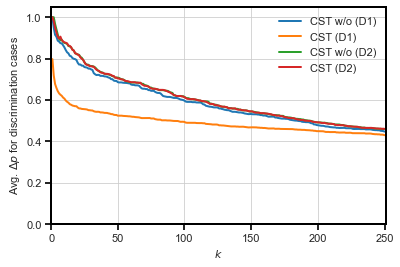

In [23]:
plt.plot(k_results['k'], k_results['CST_wo_d1_diff'], label='CST w/o (D1)')
plt.plot(k_results['k'], k_results['CST_wi_d1_diff'], label='CST (D1)')
plt.plot(k_results['k'], k_results['CST_wo_d2_diff'], label='CST w/o (D2)')
plt.plot(k_results['k'], k_results['CST_wi_d2_diff'], label='CST (D2)')
plt.xlim(0, k_u+1)
plt.xlabel("$k$")
plt.ylim(0.0, 1.05)
plt.ylabel("Avg. $\Delta p$ for discrimination cases")
plt.legend()
# plt.title('multiple plots')
plt.show()

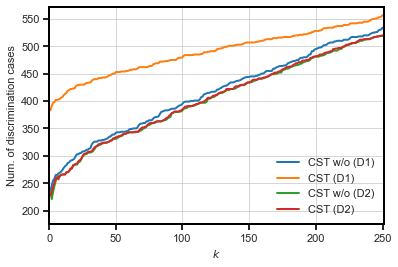

In [24]:
plt.plot(k_results['k'], k_results['CST_wo_d1_num'], label='CST w/o (D1)')
plt.plot(k_results['k'], k_results['CST_wi_d1_num'], label='CST (D1)')
plt.plot(k_results['k'], k_results['CST_wo_d2_num'], label='CST w/o (D2)')
plt.plot(k_results['k'], k_results['CST_wi_d2_num'], label='CST (D2)')
plt.xlim(0, k_u+1)
plt.xlabel("$k$")
plt.ylim(175, k_results.iloc[-1].max() + 15)
# plt.ylim(k_results.iloc[0].min() - 5, k_results.iloc[-1].max() + 5)
plt.ylabel("Num. of discrimination cases")
plt.legend()
# plt.title('multiple plots')
plt.show()

## The impact of $|\tau|$, given $K$

In [25]:
### data
test_df    = org_df.copy()
test_cf_df = org_cf_df.copy()

### parameters
alpha = 0.05
tau   = 0.0
n = 15

### CST object
cst = SituationTesting()
cst.setup_baseline(test_df, test_cf_df, nominal_atts=['Gender'], continuous_atts=['AnnualSalary', 'AccountBalance'])

In [26]:
# d1: discrimination definition based on the literal comparison
# d2: discrimination definition based on statistical significance

temp_tau = []

for tau in np.arange(0.0, 1.05, 0.05): 
    print(round(tau, 2))
    
    # --- CST without
    cst.run(target_att='LoanApproval', target_val={'positive': 1, 'negative': -1}, 
            sensitive_att='Gender', sensitive_val={'non_protected': 0, 'protected': 1},
            include_centers=False, 
            k=n, alpha=alpha, tau=round(tau, 2))
    
    temp_test_disc_wo = cst.get_test_discrimination()
    
    # --- CST with
    cst.run(target_att='LoanApproval', target_val={'positive': 1, 'negative': -1}, 
            sensitive_att='Gender', sensitive_val={'non_protected': 0, 'protected': 1},
            include_centers=True, 
            k=n, alpha=alpha, tau=round(tau, 2))
    
    temp_test_disc_wi = cst.get_test_discrimination()
    
    # --- results
    temp_tau.append(
        {
        'tau': round(tau, 2),
        # Num. of discrimination cases
        'CST_wo_d1_num': temp_test_disc_wo[temp_test_disc_wo['DiscEvi'] == 'Yes'].shape[0],
        'CST_wi_d1_num': temp_test_disc_wi[temp_test_disc_wi['DiscEvi'] == 'Yes'].shape[0],
        'CST_wo_d2_num': temp_test_disc_wo[(temp_test_disc_wo['DiscEvi'] == 'Yes') & (temp_test_disc_wo['StatEvi'] == 'Yes')].shape[0],
        'CST_wi_d2_num': temp_test_disc_wi[(temp_test_disc_wi['DiscEvi'] == 'Yes') & (temp_test_disc_wi['StatEvi'] == 'Yes')].shape[0],
        # Avg. delta p
        'CST_wo_d1_diff': temp_test_disc_wo[temp_test_disc_wo['DiscEvi'] == 'Yes']['org_diff'].mean(),
        'CST_wi_d1_diff': temp_test_disc_wi[temp_test_disc_wi['DiscEvi'] == 'Yes']['org_diff'].mean(),
        'CST_wo_d2_diff': temp_test_disc_wo[(temp_test_disc_wo['DiscEvi'] == 'Yes') & (temp_test_disc_wo['StatEvi'] == 'Yes')]['org_diff'].mean(),
        'CST_wi_d2_diff': temp_test_disc_wi[(temp_test_disc_wi['DiscEvi'] == 'Yes') & (temp_test_disc_wi['StatEvi'] == 'Yes')]['org_diff'].mean(),
        }
    )
    
    del temp_test_disc_wo, temp_test_disc_wi

tau_results = pd.DataFrame(temp_tau)
del temp_tau

print('=== DONE ===')

0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
1.0
=== DONE ===


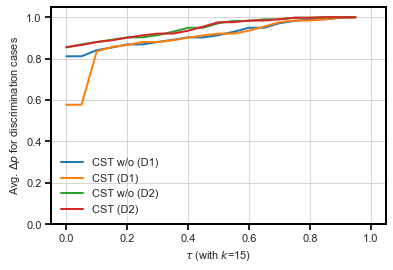

In [27]:
plt.plot(tau_results['tau'], tau_results['CST_wo_d1_diff'], label='CST w/o (D1)')
plt.plot(tau_results['tau'], tau_results['CST_wi_d1_diff'], label='CST (D1)')
plt.plot(tau_results['tau'], tau_results['CST_wo_d2_diff'], label='CST w/o (D2)')
plt.plot(tau_results['tau'], tau_results['CST_wi_d2_diff'], label='CST (D2)')
plt.xlim(-0.05, 1.05)
plt.xlabel(f"$\\tau$ (with $k$={n})")
plt.ylim(0.0, 1.05)
plt.ylabel("Avg. $\Delta p$ for discrimination cases")
plt.legend()
# plt.title('multiple plots')
plt.show()

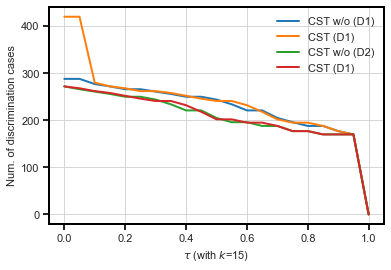

In [28]:
plt.plot(tau_results['tau'], tau_results['CST_wo_d1_num'], label='CST w/o (D1)')
plt.plot(tau_results['tau'], tau_results['CST_wi_d1_num'], label='CST (D1)')
plt.plot(tau_results['tau'], tau_results['CST_wo_d2_num'], label='CST w/o (D2)')
plt.plot(tau_results['tau'], tau_results['CST_wi_d2_num'], label='CST (D1)')
plt.xlim(-0.05, 1.05)
plt.xlabel(f"$\\tau$ (with $k$={n})")
# plt.ylim(200, tau_results.iloc[-1].max() + 15)
plt.ylabel("Num. of discrimination cases")
plt.legend()
# plt.title('multiple plots')
plt.show()

In [ ]:
# The tau results further reinforce the results: notce the drop in CST w/ under Def 1!!!

In [29]:
### data
test_df    = org_df.copy()
test_cf_df = org_cf_df.copy()

### parameters
alpha = 0.05
tau   = 0.0
n = 250

### CST object
cst = SituationTesting()
cst.setup_baseline(test_df, test_cf_df, nominal_atts=['Gender'], continuous_atts=['AnnualSalary', 'AccountBalance'])

In [30]:
# d1: discrimination definition based on the literal comparison
# d2: discrimination definition based on statistical significance

temp_tau = []

for tau in np.arange(0.0, 1.05, 0.05): 
    print(round(tau, 2))
    
    # --- CST without
    cst.run(target_att='LoanApproval', target_val={'positive': 1, 'negative': -1}, 
            sensitive_att='Gender', sensitive_val={'non_protected': 0, 'protected': 1},
            include_centers=False, 
            k=n, alpha=alpha, tau=round(tau, 2))
    
    temp_test_disc_wo = cst.get_test_discrimination()
    
    # --- CST with
    cst.run(target_att='LoanApproval', target_val={'positive': 1, 'negative': -1}, 
            sensitive_att='Gender', sensitive_val={'non_protected': 0, 'protected': 1},
            include_centers=True, 
            k=n, alpha=alpha, tau=round(tau, 2))
    
    temp_test_disc_wi = cst.get_test_discrimination()
    
    # --- results
    temp_tau.append(
        {
        'tau': round(tau, 2),
        # Num. of discrimination cases
        'CST_wo_d1_num': temp_test_disc_wo[temp_test_disc_wo['DiscEvi'] == 'Yes'].shape[0],
        'CST_wi_d1_num': temp_test_disc_wi[temp_test_disc_wi['DiscEvi'] == 'Yes'].shape[0],
        'CST_wo_d2_num': temp_test_disc_wo[(temp_test_disc_wo['DiscEvi'] == 'Yes') & (temp_test_disc_wo['StatEvi'] == 'Yes')].shape[0],
        'CST_wi_d2_num': temp_test_disc_wi[(temp_test_disc_wi['DiscEvi'] == 'Yes') & (temp_test_disc_wi['StatEvi'] == 'Yes')].shape[0],
        # Avg. delta p
        'CST_wo_d1_diff': temp_test_disc_wo[temp_test_disc_wo['DiscEvi'] == 'Yes']['org_diff'].mean(),
        'CST_wi_d1_diff': temp_test_disc_wi[temp_test_disc_wi['DiscEvi'] == 'Yes']['org_diff'].mean(),
        'CST_wo_d2_diff': temp_test_disc_wo[(temp_test_disc_wo['DiscEvi'] == 'Yes') & (temp_test_disc_wo['StatEvi'] == 'Yes')]['org_diff'].mean(),
        'CST_wi_d2_diff': temp_test_disc_wi[(temp_test_disc_wi['DiscEvi'] == 'Yes') & (temp_test_disc_wi['StatEvi'] == 'Yes')]['org_diff'].mean(),
        }
    )
    
    del temp_test_disc_wo, temp_test_disc_wi

tau_results = pd.DataFrame(temp_tau)
del temp_tau

print('=== DONE ===')

0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
1.0
=== DONE ===


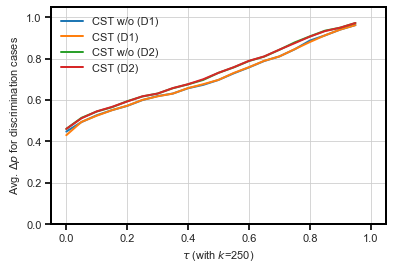

In [31]:
plt.plot(tau_results['tau'], tau_results['CST_wo_d1_diff'], label='CST w/o (D1)')
plt.plot(tau_results['tau'], tau_results['CST_wi_d1_diff'], label='CST (D1)')
plt.plot(tau_results['tau'], tau_results['CST_wo_d2_diff'], label='CST w/o (D2)')
plt.plot(tau_results['tau'], tau_results['CST_wi_d2_diff'], label='CST (D2)')
plt.xlim(-0.05, 1.05)
plt.xlabel(f"$\\tau$ (with $k$={n})")
plt.ylim(0.0, 1.05)
plt.ylabel("Avg. $\Delta p$ for discrimination cases")
plt.legend()
# plt.title('multiple plots')
plt.show()

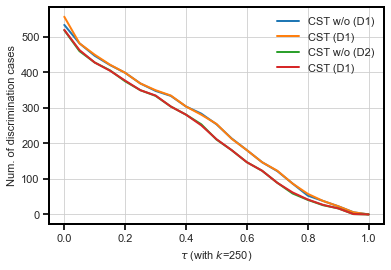

In [32]:
plt.plot(tau_results['tau'], tau_results['CST_wo_d1_num'], label='CST w/o (D1)')
plt.plot(tau_results['tau'], tau_results['CST_wi_d1_num'], label='CST (D1)')
plt.plot(tau_results['tau'], tau_results['CST_wo_d2_num'], label='CST w/o (D2)')
plt.plot(tau_results['tau'], tau_results['CST_wi_d2_num'], label='CST (D1)')
plt.xlim(-0.05, 1.05)
plt.xlabel(f"$\\tau$ (with $k$={n})")
# plt.ylim(200, tau_results.iloc[-1].max() + 15)
plt.ylabel("Num. of discrimination cases")
plt.legend()
# plt.title('multiple plots')
plt.show()

### EOF